###Introduction

In this homework, you will explore the California Housing Dataset using Principal Component Analysis (PCA) as a method of dimensionality reduction. You will start by loading the dataset and then apply PCA to the numerical columns. You will analyze how scaling the data versus not scaling it impacts the PCA results and visualize the differences between the transformed and original data.

By the end of this assignment, you will have gained hands-on experience with PCA, an essential technique in data mining and machine learning. All tasks should be completed using Python in a Jupyter Notebook. For questions that require textual explanations, please use Markdown to format your responses within text blocks.

## California Housing Dataset

### Data Set Columns:

1. **longitude:** A measure of how far west a house is located; higher values indicate a location farther west.
2. **latitude:** A measure of how far north a house is located; higher values indicate a location farther north.
3. **housingMedianAge:** The median age of houses within a block; lower numbers represent newer buildings.
4. **totalRooms:** The total number of rooms within a block.
5. **totalBedrooms:** The total number of bedrooms within a block.
6. **population:** The total number of people residing within a block.
7. **households:** The total number of households, where a household is defined as a group of people residing in a single home unit, within a block.
8. **medianIncome:** The median income for households within a block (measured in tens of thousands of US dollars).
9. **medianHouseValue:** The median house value for households within a block (measured in US dollars).
10. **oceanProximity:** The location of the house in relation to the ocean or sea.

### References:

- Pace, R. Kelley, and Ronald Barry. "Sparse Spatial Autoregressions." *Statistics and Probability Letters*, 33 (1997): 291-297.



### Question 1: Load and Scale the Dataset

1. **Load the Dataset and Keep Only Numerical Columns:**
   - Use the `pandas.read_csv()` function to load the California Housing Dataset. The dataset will be provided to you as a CSV file. After loading the dataset, keep only the following numerical columns (excluding `medianHouseValue`):
     - `longitude`, `latitude`, `housingMedianAge`, `totalRooms`, `totalBedrooms`, `population`, `households`, `medianIncome`
   
    Follow this link for more details on how to use `read_csv`: [pandas.read_csv() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

2. **Transform the Dataset:**
   - Generate two versions of the dataset:
     - `df`: The original dataset with only the selected numerical columns (unscaled).
     - `scaled_df`: The dataset with the selected numerical columns, but scaled using standard scaling techniques (e.g., StandardScaler from `sklearn`).
     
     **Hint:** You can use `StandardScaler` from `scikit-learn` for scaling. Ensure that both datasets are stored separately and can be accessed later for comparison.
     
     Follow this link for more details on how to use `PCA`: [scikit-learn PCA Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).


3. **Preview the Datasets:**
   - Display the first five rows of both `df` and `scaled_df` using the `head()` method.
   
    Refer to this link for more details on how to use `head()`: [pandas.DataFrame.head() Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html).

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/housing-1.csv')

In [ ]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
num_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
df_num=df[num_columns]
df_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [ ]:
print(df_num.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64


In [ ]:
df_num_clean = df_num.dropna()
df_num_clean = df_num.fillna(df_num.mean())

In [ ]:
print(df_num_clean.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num_clean)
scaled_df = pd.DataFrame(scaled_data, columns=num_columns)

In [ ]:
print("Original Dataset (Unscaled):")
print(df_num_clean.head())

print("\nScaled Dataset:")
print(scaled_df.head())

Original Dataset (Unscaled):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  
0       322.0       126.0         8.3252  
1      2401.0      1138.0         8.3014  
2       496.0       177.0         7.2574  
3       558.0       219.0         5.6431  
4       565.0       259.0         3.8462  

Scaled Dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1  -1.322844  1.043185           -0.607019     2.045890        1.355088   
2  -1.332827  1.0385


### Question 2: PCA Transformations

1. **Principal Component Analysis: Original Dataset**
   - Use the `PCA` function from `scikit-learn` to instantiate a PCA object with `n_components=2`. Fit and transform the original unscaled dataset (`df`) to reduce its dimensionality to two principal components. Store the resulting transformed data.

2. **Principal Component Analysis: Scaled Dataset**
   - Similarly, use the `PCA` function from `scikit-learn` to instantiate another PCA object with `n_components=2`. Fit and transform the scaled dataset (`scaled_df`) to reduce its dimensionality to two principal components. Store the resulting transformed data.


In [ ]:
pca_original = PCA(n_components=2)
pca_original_transformed = pca_original.fit_transform(df_num_clean)
pca_original_df = pd.DataFrame(data=pca_original_transformed, columns=['PC1', 'PC2'])

print("PCA on Original Dataset:")
print(pca_original_df.head())

PCA on Original Dataset:
           PC1          PC2
0 -2130.424332  -253.083796
1  4529.085936 -1035.137534
2 -1522.716698  -352.662829
3 -1653.597495  -204.955577
4 -1326.256259  -350.151309


In [ ]:
pca_scaled = PCA(n_components=2)
pca_scaled_transformed = pca_scaled.fit_transform(scaled_df)
pca_scaled_df = pd.DataFrame(data=pca_scaled_transformed, columns=['PC1', 'PC2'])

print("PCA on Scaled Dataset:")
print(pca_scaled_df.head())

PCA on Scaled Dataset:
        PC1       PC2
0 -2.094402  1.395471
1  2.943439  1.933379
2 -1.970721  1.464207
3 -1.920034  1.505871
4 -1.777657  1.564584


### Question 3: Against Target Variable

1. **Plot Top Principal Component Against `medianHouseValue` for df:**
   - Using the top principal component obtained from the PCA on the original dataset (`df`), create a scatter plot with the top principal component on the x-axis and `medianHouseValue` on the y-axis. This will allow you to examine the relationship between the most significant principal component and the target variable.
   
2. **Plot Top Principal Component Against `medianHouseValue` for scaled_df:**
  - Similarly, create a scatter plot using the top principal component from the PCA on the scaled dataset (`scaled_df`), again plotting it against `medianHouseValue`.


In [ ]:
# Extract PC1 from PCA results
pc1_original = pca_original_df['PC1']
pc1_scaled = pca_scaled_df['PC1']
median_house_value = df['median_house_value']

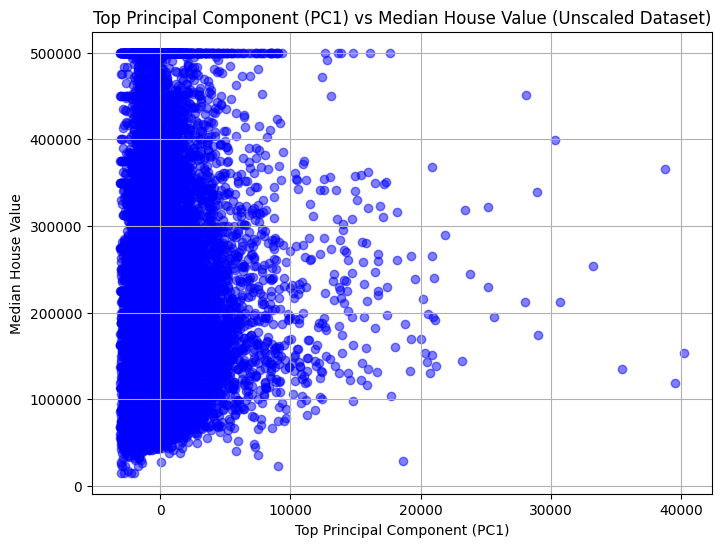

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_original_df['PC1'], df['median_house_value'], color='blue', alpha=0.5)
plt.title('Top Principal Component (PC1) vs Median House Value (Unscaled Dataset)')
plt.xlabel('Top Principal Component (PC1)')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()


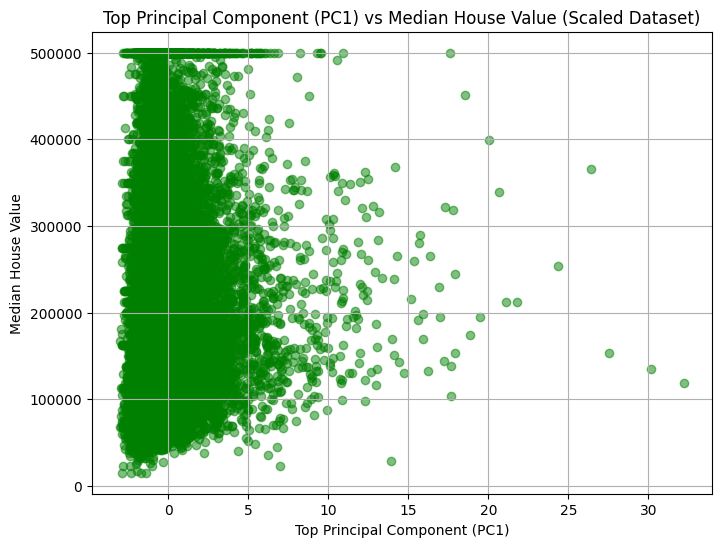

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_scaled_df['PC1'], df['median_house_value'], color='green', alpha=0.5)
plt.title('Top Principal Component (PC1) vs Median House Value (Scaled Dataset)')
plt.xlabel('Top Principal Component (PC1)')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()


### Authentication: Write Down Your Information

In the following code block, print your Student ID, Name, and Homework number in the specified format:

```python
# Replace the placeholders with your actual information
info = [yourid, yourname, homework_number]
for id, name, homework in info:
    print(f'ID: {id}\nName: {name}\nHomework: {homework}')


In [ ]:
info = [('1002162937', 'Swathi Manjunatha', '002')]
for id, name, homework in info:
    print(f'ID: {id}\nName: {name}\nHomework: {homework}')

ID: 1002162937
Name: Swathi Manjunatha
Homework: 002


### Question 4: Linear Regression Models

In this question, you will implement two different linear regression models to predict the `medianHouseValue` using the dataset. The first model will use two selected features from the original dataset, while the second model will use the top two principal components from PCA.

Follow this link for more details on how to use `LinearRegression`: [scikit-learn LinearRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


1. **Train Linear Regression with 2 Variables:**
    - Select **any two columns** from the original dataset (`df`) to predict `medianHouseValue`.
    - Use these two features to train a linear regression model.
    - Report the following metrics for the **training set**:
      - R-squared (`R²`)
      - Mean Squared Error (MSE)

2. **Train Linear Regression with 2 Variables:**
    - Perform PCA on the dataset to extract the top two principal components (`PC1` and `PC2`).
    - Use `PC1` and `PC2` to train another linear regression model to predict `medianHouseValue`.
    - Report the following metrics for the **training set**:
      - R-squared (`R²`)
      - Mean Squared Error (MSE)



In [ ]:
X = df[['housing_median_age', 'median_income']]
y = df['median_house_value']

lr_model = LinearRegression()
lr_model.fit(X, y)

y_pred = lr_model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Linear Regression with 2 Variables (Original Dataset):")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

Linear Regression with 2 Variables (Original Dataset):
R-squared: 0.5091195899765227
Mean Squared Error: 6536319572.71042


In [ ]:
X_pca = pca_original_df[['PC1', 'PC2']]
y = df['median_house_value']

lr_model_pca = LinearRegression()
lr_model_pca.fit(X_pca, y)

y_pred_pca = lr_model_pca.predict(X_pca)

r2_pca = r2_score(y, y_pred_pca)
mse_pca = mean_squared_error(y, y_pred_pca)

print(f"Linear Regression with PCA Components:")
print(f"R-squared: {r2_pca}")
print(f"Mean Squared Error: {mse_pca}")

Linear Regression with PCA Components:
R-squared: 0.09173870540351459
Mean Squared Error: 12093955993.726414
